Importing the Dependencis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score

Importing Loan data and process it.

In [2]:
data = pd.read_csv('/content/loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
# Statistical measures.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Checking missing values.
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
# Adding string to the missing values.
data = data.fillna(' ')

In [8]:
# checking again for missing values.
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
# Label Incoding.
# Replacing all the Y by 1 and N by 0 in the Loan_Status column.
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-3170946687.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [11]:
# checking dependents value count.
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51
,15


In [12]:
# Replacing all the 3+ values to 4 for better learning of the model.
data = data.replace(to_replace='3+', value=4)

In [13]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51
,15


Data Visualization.

<Axes: xlabel='Education', ylabel='count'>

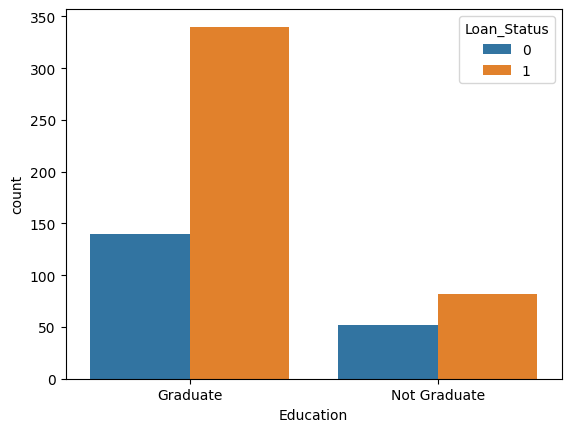

In [14]:
# Education and loan status.
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

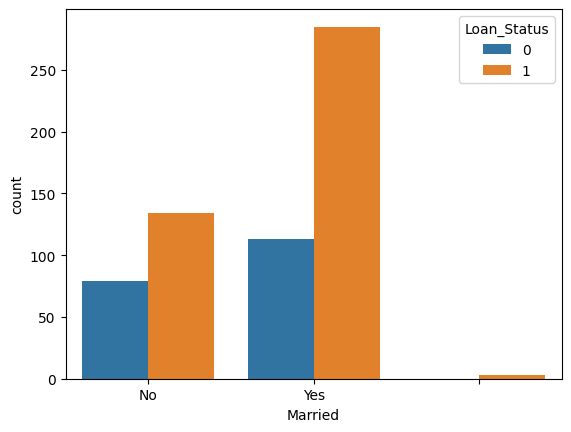

In [15]:
# Marrital status and Loan status.
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

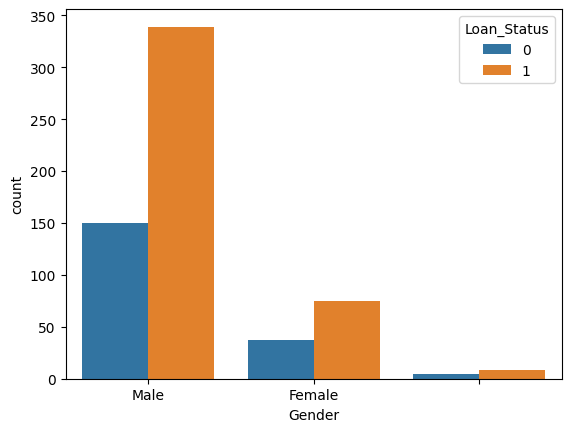

In [16]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)

In [17]:
data.replace({
    "Married": {'Yes': 1, 'No': 0},
    "Gender": {'Male': 1, 'Female': 0},
    "Self_Employed": {'Yes': 1, 'No': 0},
    "Property_Area": {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    "Education": {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)

/tmp/ipython-input-3854880394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [19]:
from re import X
# Droping and sepereating data.
X = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [20]:
print(X)

    Gender Married Dependents  Education Self_Employed  ApplicantIncome  \
0        1       0          0          1             0             5849   
1        1       1          1          1             0             4583   
2        1       1          0          1             1             3000   
3        1       1          0          0             0             2583   
4        1       0          0          1             0             6000   
..     ...     ...        ...        ...           ...              ...   
609      0       0          0          1             0             2900   
610      1       1          4          1             0             4106   
611      1       1          1          1             0             8072   
612      1       1          2          1             0             7583   
613      0       0          0          1             1             4583   

     CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History  \
0                  0.0        

In [21]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [22]:
# train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [24]:
# Training SVM model.
model = svm.SVC(kernel='linear')

# Handle the ' ' string values that caused the ValueError
# Replace ' ' with NaN across the entire dataframe before splitting
X_train = X_train.replace(' ', np.nan)
X_test = X_test.replace(' ', np.nan)

# Convert columns that should be numeric to numeric type
# Using pd.to_numeric with errors='coerce' to turn any unconvertible values into NaN
numeric_cols_to_convert = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
for col in numeric_cols_to_convert:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Impute NaN values
# For numeric columns, use median imputation from the training set
for col in numeric_cols_to_convert:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)

# For categorical columns that might still have NaN after replacing ' ' with NaN,
# impute with mode from the training set
categorical_cols_to_impute = ['Gender', 'Married', 'Self_Employed']
for col in categorical_cols_to_impute:
    if X_train[col].isnull().any():
        mode_val = X_train[col].mode()[0] # mode() returns a Series, take the first value
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True)

model.fit(X_train,Y_train)

/tmp/ipython-input-135048109.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace(' ', np.nan)
/tmp/ipython-input-135048109.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace(' ', np.nan)
/tmp/ipython-input-135048109.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

SVC(kernel='linear')

In [25]:
# Accuracy on Training data.
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_accuracy)

Accuracy on Training data :  0.7971014492753623


In [26]:
# Accuracy on testing data.
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Testing data : ', testing_accuracy)

Accuracy on Testing data :  0.7903225806451613


In [27]:
# Making a predictive system.
sample_index = 0 # Taking the first sample from the test set
sample_data = X_test.iloc[sample_index].values.reshape(1, -1)
sample_prediction = model.predict(sample_data)

print(f"Original Loan Status (Y_test): {Y_test.iloc[sample_index]}")
print(f"Predicted Loan Status: {sample_prediction[0]}")

if sample_prediction[0] == 1:
    print('The loan is approved.')
else:
    print('The loan is not approved.')

Original Loan Status (Y_test): 1
Predicted Loan Status: 1
The loan is approved.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
